In [ ]:
import re
import cv2
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Converting RGB images to grayscale using the formula**

In [ ]:
image = cv2.imread('image.jpeg',0)

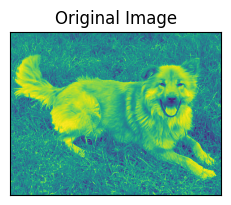

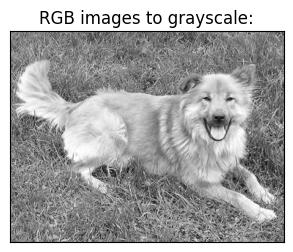

In [ ]:
def GrayscaleImage(rgb_img):
    # grayscale image = ((0.3 * R) + (0.59 * G) + (0.11 * B))
    R = rgb_img[:,2]
    G = rgb_img[:,1]
    B = rgb_img[:,0]
    gray_img = 0.3 * R + 0.59 * G + 0.11 * B
    gray_img = gray_img.astype(np.uint8)
    return gray_img

plt.figure(figsize=(6,6))
plt.subplot(221), plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

gray_img_formula = GrayscaleImage(image)
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('RGB images to grayscale:'), plt.xticks([]), plt.yticks([])

plt.show()

**Design a 3x3 convolution and correlation filter for this dataset.**

**convolution**

In [ ]:
image = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)

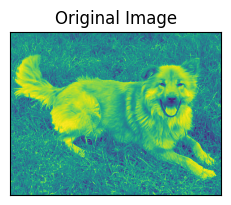

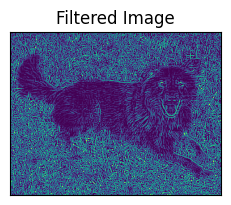

In [ ]:
kernel = np.array([[-1, -1, -1],
                  [-1,  8, -1],
                  [-1, -1, -1]])

# Apply the convolution filter to the image
convoluted_image = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(6,6))
plt.subplot(221), plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(6,6))
plt.subplot(221), plt.imshow(convoluted_image)
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

**correlation**

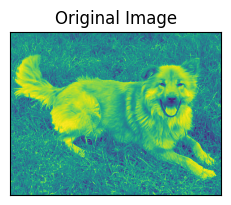

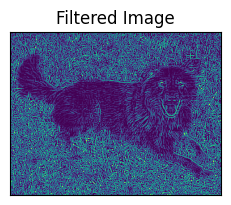

In [ ]:
# Define the 3x3 correlation filter (no need to flip it)
kernel = np.array([[-1, -1, -1],
                  [-1,  8, -1],
                  [-1, -1, -1]])

# Apply the correlation filter to the image
correlated_image = cv2.filter2D(image, -1, kernel)

# Display the original and filtered images
plt.figure(figsize=(6,6))
plt.subplot(221), plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(6,6))
plt.subplot(221), plt.imshow(correlated_image)
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

**Gradient Filtering using Sobel Operator**

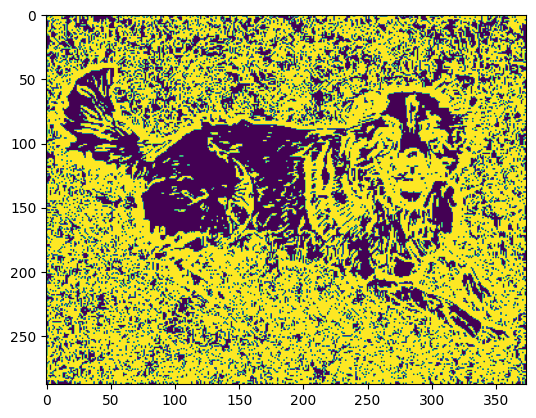

In [ ]:
img = cv2.imread('image.jpeg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3, 3), 0)

x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

mag, angle = cv2.cartToPolar(x, y, angleInDegrees=True)

edges = cv2.threshold(mag, 50, 255, cv2.THRESH_BINARY)[1]
plt.imshow(edges)

**Second Derivatives: The Laplacian**

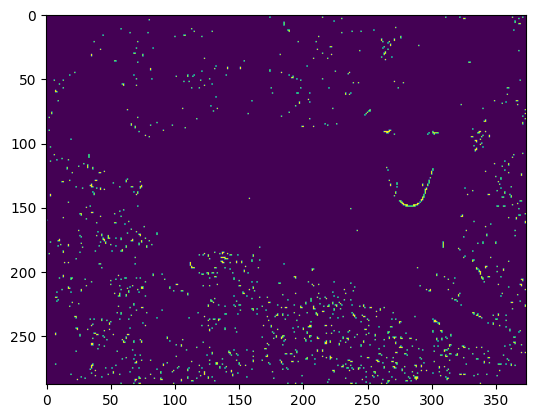

In [ ]:
img = cv2.imread('image.jpeg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3, 3), 0)
laplacian = cv2.Laplacian(blur, cv2.CV_64F)
edges = cv2.threshold(laplacian, 50, 255, cv2.THRESH_BINARY)[1]
plt.imshow(edges)

**Identifying the type of noise (Gaussian or Salt and Pepper) in images.**

In [ ]:
image = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)

In [ ]:
image1 = cv2.imread('image1.jpeg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('image2.jpeg', cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('image3.jpeg', cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread('image4.jpeg', cv2.IMREAD_GRAYSCALE)
image5 = cv2.imread('image5.jpeg', cv2.IMREAD_GRAYSCALE)
image6 = cv2.imread('image6.jpeg', cv2.IMREAD_GRAYSCALE)
image7 = cv2.imread('image7.jpeg', cv2.IMREAD_GRAYSCALE)
image8 = cv2.imread('image8.jpeg', cv2.IMREAD_GRAYSCALE)
image9 = cv2.imread('image9.jpeg', cv2.IMREAD_GRAYSCALE)
image10 = cv2.imread('image10.jpeg', cv2.IMREAD_GRAYSCALE)
image11 = cv2.imread('image11.jpeg', cv2.IMREAD_GRAYSCALE)
image12 = cv2.imread('image12.jpeg', cv2.IMREAD_GRAYSCALE)
image13 = cv2.imread('image13.jpeg', cv2.IMREAD_GRAYSCALE)
image14 = cv2.imread('image14.jpeg', cv2.IMREAD_GRAYSCALE)
image15 = cv2.imread('image15.jpeg', cv2.IMREAD_GRAYSCALE)
image16 = cv2.imread('image16.jpeg', cv2.IMREAD_GRAYSCALE)
image17 = cv2.imread('image17.jpeg', cv2.IMREAD_GRAYSCALE)
image18 = cv2.imread('image18.jpeg', cv2.IMREAD_GRAYSCALE)
image19 = cv2.imread('image19.jpeg', cv2.IMREAD_GRAYSCALE)

In [ ]:
images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10, image11, image12, image13, image14, image15, image16, image17, image18, image19]

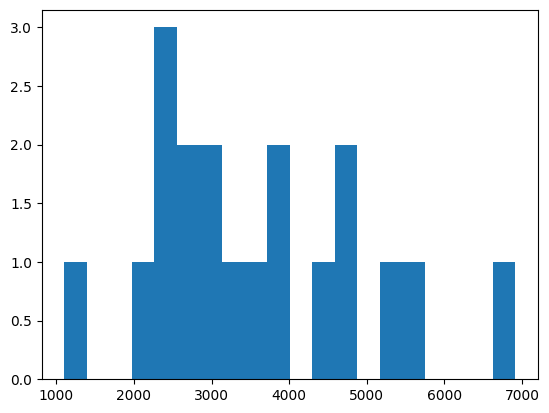

In [ ]:
#Setting a threshold by plotting a histogram
VarArr = []
for img in images:
  variance = np.var(img)
  VarArr.append(variance)

plt.hist(VarArr, bins=20)
plt.show()

In [ ]:
#checking gaussian noise detection
threshold = 2500
for image in images:
  variance = np.var(image)
  if variance > threshold:
    print("Gaussian noise is present.")
  else:
    print("Salt and pepper noise is present.")

Gaussian noise is present.
Gaussian noise is present.
Gaussian noise is present.
Gaussian noise is present.
Gaussian noise is present.
Gaussian noise is present.
Salt and pepper noise is present.
Gaussian noise is present.
Salt and pepper noise is present.
Gaussian noise is present.
Gaussian noise is present.
Gaussian noise is present.
Gaussian noise is present.
Gaussian noise is present.
Gaussian noise is present.
Gaussian noise is present.
Salt and pepper noise is present.
Salt and pepper noise is present.
Gaussian noise is present.


### **Text Processing**

In [ ]:
pip install nltk spacy

In [ ]:
pip install nltk

In [ ]:
pip install scikit-learn

**Loading the dataset using pandas and split it into training and testing sets**

In [ ]:
df = pd.read_csv('LabelledTweets.csv')

In [ ]:
X = df['Tweets']
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Implementing the Bag of Words Feature Extraction Technique.**

In [ ]:
print("BOW Representation:")
vectorizer = CountVectorizer()

X_train_BOW = vectorizer.fit_transform(X_train)
X_test_BOW = vectorizer.transform(X_test)

BOWmatrix_train = X_train_BOW.toarray()
print(BOWmatrix_train)

BOWmatrix_test = X_test_BOW.toarray()
print(BOWmatrix_test)

BOW Representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Implementing the TF-IDF Feature Extraction Technique.**

In [ ]:
print("TF-IDF Representation:")
Vectorizer = TfidfVectorizer()

X_train_TFIDF = Vectorizer.fit_transform(X_train)
X_test_TFIDF = Vectorizer.transform(X_test)

TFIDFmatrix_train = X_train_TFIDF.toarray()
print(TFIDFmatrix_train)

TFIDFmatrix_test = X_test_TFIDF.toarray()
print(TFIDFmatrix_test)

TF-IDF Representation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### **Preprocessing the provided data with inbuilt libraries using**

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**➢ Tokenization: Tokenize the text into individual words or tokens.**

In [ ]:
def Tokenize(tweets):
    return word_tokenize(tweets)

df['TokenizedText'] = df['Tweets'].apply(Tokenize)

print("DataFrame with Tokenized Text:")
print(df['TokenizedText'])

DataFrame with Tokenized Text:
0        [!, !, !, RT, @, mayasolovely, :, As, a, woman...
1        [!, !, !, !, !, RT, @, mleew17, :, boy, dats, ...
2        [!, !, !, !, !, !, !, RT, @, UrKindOfBrand, Da...
3        [!, !, !, !, !, !, !, !, !, RT, @, C_G_Anderso...
4        [!, !, !, !, !, !, !, !, !, !, !, !, !, RT, @,...
                               ...                        
24778    [you, 's, a, muthaf, *, *, *, in, lie, &, #, 8...
24779    [you, 've, gone, and, broke, the, wrong, heart...
24780    [young, buck, wan, na, eat, !, !, .., dat, nig...
24781        [youu, got, wild, bitches, tellin, you, lies]
24782    [~~Ruffled, |, Ntac, Eileen, Dahlia, -, Beauti...
Name: TokenizedText, Length: 24783, dtype: object


**➢ Lowercasing: Convert all tokens to lowercase.**

In [ ]:
def LowerCase(tweets):
    return tweets.lower()

df['Tweets'] = df['Tweets'].apply(LowerCase)

print("DataFrame with Tokenized Text:")
print(df['Tweets'])

DataFrame with Tokenized Text:
0        !!! rt @mayasolovely: as a woman you shouldn't...
1        !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3        !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4        !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: Tweets, Length: 24783, dtype: object


**➢ Stop word Removal: Remove common English stop words, i.e., a, is, am, the, as, of, to, from.**

In [ ]:
#List of stop words
StopWords = {'a', 'as', 'is', 'i', 'am', 'to', 'from', 'and', 'the', 'that', 'this', 'they', 'of', 'on', 'with', 'in'}
#NLTKStopWords = set(stopwords.words('english'))

def RemovingStopwords(text):
    words = text.split()
    Word = [word for word in words if word.lower() not in StopWords]
    return ' '.join(Word)

df['Tweets'] = df['Tweets'].apply(RemovingStopwords)

print("Stop Words Removal from Tweets:")
print(df['Tweets'])

Stop Words Removal from Tweets:
0        !!! rt @mayasolovely: woman you shouldn't comp...
1        !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3        !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4        !!!!!!!!!!!!! rt @shenikaroberts: shit you hea...
                               ...                        
24778    you's muthaf***in lie &#8220;@lifeasking: @20_...
24779    you've gone broke wrong heart baby, drove me r...
24780    young buck wanna eat!!.. dat nigguh like aint ...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: Tweets, Length: 24783, dtype: object


**➢ Smoothing: Implement Laplace smoothing to handle out-of-vocabulary words.**

In [ ]:
corpus = df['Tweets']

words = [word for sentence in corpus for word in sentence.split()]
Vocabulary = set(words)

count = Counter(words)

threshold = 1
total = len(Vocabulary)
TotalCount = {word: (count[word] + threshold) / (len(words) + threshold * total) for word in Vocabulary}

for word, count in TotalCount.items():
    print(f"{word}: {count:.6f}")

Streaming output truncated to the last 5000 lines.
getup: 0.000009
@nezzie__nezz:: 0.000006
a-rod.: 0.000006
@green_eyed_doll:: 0.000006
looming: 0.000006
@amy0813amy: 0.000009
mold,: 0.000006
twitch: 0.000006
real: 0.001059
*too: 0.000006
waisted: 0.000006
reeds: 0.000006
birthday&#10084;&#65039;&#128535;: 0.000006
dudes...: 0.000006
@_thecrownedhead:: 0.000006
@badnewsali:: 0.000009
medical: 0.000020
&#128536;&#10084;: 0.000006
chipotle: 0.000023
fro,: 0.000006
http://t.co/iosarfs3ro: 0.000006
rascally: 0.000006
kardashians: 0.000006
rting: 0.000011
microwave: 0.000011
felon.: 0.000006
cocked,: 0.000006
@stevedischiavi: 0.000006
@suckmy_john_son:: 0.000006
@weirdstyle:: 0.000006
@nateclark_:: 0.000006
vanish: 0.000006
@haley_dych:: 0.000006
contact: 0.000023
party's: 0.000006
limewire: 0.000006
watcha: 0.000006
@mr_buckets5:: 0.000006
@pearls_n_kisses:: 0.000006
@kaymckinneyy: 0.000006
@iam_kandiraven: 0.000006
@titan4ever2488: 0.000011
acre: 0.000006
'look: 0.000006
friday: 0.000080

**➢ Normalization: Normalize the text by removing punctuation and special characters.**

In [ ]:
def NormalizedText(tweets):
    #Remove special characters
    tweets = re.sub(r'[^\w\s]', '', tweets)
    #Remove punctuations
    tweets = re.sub(r'\W', '', tweets)
    return tweets

df['Tweets'] = df['Tweets'].apply(NormalizedText)

# Print the normalized tweets
print("Normalized Tweets")
print(df['Tweets'])

Normalized Tweets
0        RTmayasolovelyAsawomanyoushouldntcomplainabout...
1        RTmleew17boydatscoldtygadwnbadforcuffindathoei...
2        RTUrKindOfBrandDawgRT80sbaby4lifeYoueverfuckab...
3               RTC_G_Andersonviva_basedshelooklikeatranny
4        RTShenikaRobertsTheshityouhearaboutmemightbetr...
                               ...                        
24778    yousamuthafinlie8220LifeAsKing20_Pearlscorey_e...
24779    youvegoneandbrokethewrongheartbabyanddrovemere...
24780    youngbuckwannaeatdatnigguhlikeIaintfuckindisup...
24781                      youugotwildbitchestellinyoulies
24782    RuffledNtacEileenDahliaBeautifulcolorcombinati...
Name: Tweets, Length: 24783, dtype: object


**➢ Stemming: Apply stemming to reduce words to their base form.**

In [ ]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def NLTKstemming(text):
    words = word_tokenize(text)
    stemmed_words = [ps.stem(w) for w in words if w.lower() not in stop_words]
    return ' '.join(stemmed_words)

df['NLTKstemmedText'] = df['Tweets'].apply(NLTKstemming)
print(df['NLTKstemmedText'])

0        ! ! ! rt @ mayasolov : woman n't complain clea...
1        ! ! ! ! ! rt @ mleew17 : boy dat cold ... tyga...
2        ! ! ! ! ! ! ! rt @ urkindofbrand dawg ! ! ! ! ...
3        ! ! ! ! ! ! ! ! ! rt @ c_g_anderson : @ viva_b...
4        ! ! ! ! ! ! ! ! ! ! ! ! ! rt @ shenikarobert :...
                               ...                        
24778    's muthaf * * * lie & # 8220 ; @ lifeask : @ 2...
24779    've gone broke wrong heart babi , drove rednec...
24780    young buck wan na eat ! ! .. dat nigguh like a...
24781                       youu got wild bitch tellin lie
24782    ~~ruffl | ntac eileen dahlia - beauti color co...
Name: NLTKstemmedText, Length: 24783, dtype: object


**➢ Lemmatization: Implement lemmatization to reduce words to their dictionary form.**

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['LemmatizedText'] = df['Tweets'].apply(lemmatize_text)
print("DataFrame with Lemmatized Text:")
print(df['LemmatizedText'])

DataFrame with Lemmatized Text:
0        ! ! ! rt @ mayasolov : woman n't complain clea...
1        ! ! ! ! ! rt @ mleew17 : boy dat cold ... tyga...
2        ! ! ! ! ! ! ! rt @ urkindofbrand dawg ! ! ! ! ...
3        ! ! ! ! ! ! ! ! ! rt @ c_g_anderson : @ viva_b...
4        ! ! ! ! ! ! ! ! ! ! ! ! ! rt @ shenikarobert :...
                               ...                        
24778    's muthaf * * * lie & # 8220 ; @ lifeask : @ 2...
24779    've gone broke wrong heart babi , drove rednec...
24780    young buck wan na eat ! ! .. dat nigguh like a...
24781                       youu got wild bitch tellin lie
24782    ~~ruffl | ntac eileen dahlia - beauti color co...
Name: LemmatizedText, Length: 24783, dtype: object


### **Logistic regression model**

**Building a logistic regression model from scratch using sigmoid activation function**

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def LR(X, y, rate, iterations):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))
    theta = np.zeros(n + 1)

    for _ in range(iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        grad = np.dot(X.T, (h - y)) / m
        theta -= rate * grad

    return theta

rate = 0.01
iterations = 20

ThetaOfBOW = LR(X_train_BOW.toarray(), y_train, rate, iterations)
ThetaOfTFIDF = LR(X_train_TFIDF.toarray(), y_train, rate, iterations)

def predict(X, theta):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    predictions = sigmoid(np.dot(X, theta))
    pred = (predictions >= 0.5).astype(int)
    return pred

Y_pred_BOW = predict(X_test_BOW.toarray(), ThetaOfBOW)
Y_pred_TFIDF = predict(X_test_TFIDF.toarray(), ThetaOfTFIDF)

**Evaluating the performance of the logistic regression model using the accuracy, precision,
recall, and F1-score for both classes**

In [ ]:
def Evaluation(y_true, y_pred):
    Accuracy = accuracy_score(y_true, y_pred)
    Precision = precision_score(y_true, y_pred)
    Recall = recall_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    return Accuracy, Precision, Recall, F1

AccOfBOW, PrecOfBOW, RecOfBOW, F1OfBOW = Evaluation(y_test, Y_pred_BOW)
AccOfTFIDF, PreOfTDIDF, RecOfTFIDF, F1OfTFIDF = Evaluation(y_test, Y_pred_TFIDF)

print("BoW Representation-> Accuracy:", AccOfBOW, ", Precision:", PrecOfBOW, ", Recall:", RecOfBOW, ", F1 Score:", F1OfBOW)
print("\nTF-IDF Representation-> Accuracy:", AccOfTFIDF, ", Precision:", PreOfTDIDF, ", Recall:", RecOfTFIDF, ", F1 Score:", F1OfTFIDF)
print("\n")

BoW Representation-> Accuracy: 0.8315513415372201 , Precision: 0.0 , Recall: 0.0 , F1 Score: 0.0

TF-IDF Representation-> Accuracy: 0.8315513415372201 , Precision: 0.0 , Recall: 0.0 , F1 Score: 0.0




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Accuracy:** Since the accuracy is the same for both representations, the overall performance for classification is the same.

**Precision:** The precision score shows that both models are not making any positive predictions This might indicate a problem with the model or the data.

**Recall:** The recall score indicates that the models are not effectively capturing the positive class instances. They are likely classifying all instances as the negative class.

**F1 Score:** The F1 score shows that the models are not performing well in terms of both precision and recall, which is often a sign of imbalanced classes or a misconfiguration of the models.